<a href="https://colab.research.google.com/github/Vickt-dr/Grafica/blob/main/OpneGl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade de Computação Gráfica: Casa com OpenGL no Colab**
Aluna: Victoria Ferreira de Carvalho

-------

In [ ]:
!apt-get install -y xvfb freeglut3-dev
!pip install pyopengl pyvirtualdisplay pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
freeglut3-dev is already the newest version (2.8.1-6).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


Imagem renderizada com OpenGL:


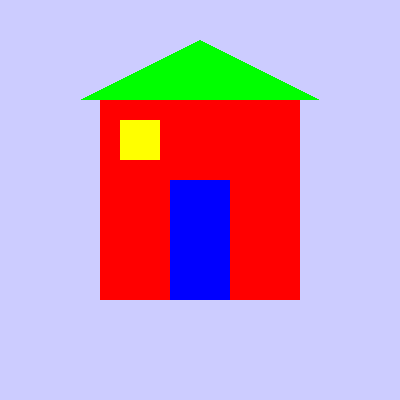

In [ ]:
import os
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *
from pyvirtualdisplay import Display
from PIL import Image

display = Display(visible=0, size=(800, 600))
display.start()

os.environ["DISPLAY"] = f":{display.display}"

def desenhar_casa():
    glClear(GL_COLOR_BUFFER_BIT)
    glLoadIdentity()

    # parede
    glColor3f(1.0, 0.0, 0.0) # vermelho
    glBegin(GL_QUADS)
    glVertex2f(-0.5, -0.5)
    glVertex2f(0.5, -0.5)
    glVertex2f(0.5, 0.5)
    glVertex2f(-0.5, 0.5)
    glEnd()

    # telhado
    glColor3f(0.0, 1.0, 0.0) # verde
    glBegin(GL_TRIANGLES)
    glVertex2f(-0.6, 0.5)
    glVertex2f(0.6, 0.5)
    glVertex2f(0.0, 0.8)
    glEnd()

    # porta
    glColor3f(0.0, 0.0, 1.0) # azul
    glBegin(GL_QUADS)
    glVertex2f(-0.15, -0.5)
    glVertex2f(0.15, -0.5)
    glVertex2f(0.15, 0.1)
    glVertex2f(-0.15, 0.1)
    glEnd()

    # janela
    glColor3f(1.0, 1.0, 0.0) # amarelo
    glBegin(GL_QUADS)
    glVertex2f(-0.4, 0.2)
    glVertex2f(-0.2, 0.2)
    glVertex2f(-0.2, 0.4)
    glVertex2f(-0.4, 0.4)
    glEnd()

    glFlush()

width, height = 400, 400

glutInit()
glutInitDisplayMode(GLUT_SINGLE | GLUT_RGB)
glutInitWindowSize(width, height)
glutCreateWindow("Casa OpenGL no Colab")

glClearColor(0.8, 0.8, 1.0, 1.0) # cor de fundo azul claro
glMatrixMode(GL_PROJECTION)
glLoadIdentity()
gluOrtho2D(-1.0, 1.0, -1.0, 1.0)
glMatrixMode(GL_MODELVIEW)

desenhar_casa()

glReadBuffer(GL_FRONT)
pixels = glReadPixels(0, 0, width, height, GL_RGB, GL_UNSIGNED_BYTE)

imagem = Image.frombytes("RGB", (width, height), pixels)
imagem = imagem.transpose(Image.FLIP_TOP_BOTTOM)

display.stop()
print("Imagem renderizada com OpenGL:")
imagem